In [1]:
import warnings,logging
# warnings.samplefilter('ignore')
logging.disable(logging.WARNING)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.7 MB/s eta 0:00:00


In [6]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as d

In [39]:
from transformers import pipeline 
from IPython.display import Image
from PIL import Image
import pandas as pd 
import random 

In [19]:
def Image2Text(MODEL_ID, img):
  ocr = pipeline('image-to-text', model = MODEL_ID)
  print(ocr(img))

In [40]:
working_dir = '/content/gdrive/MyDrive/thesis/inference/'
train_text = f'{working_dir}inference.jsonl'
def load_jsonl():
    return pd.read_json(
                        path_or_buf = train_text,
                        lines=True,
                        )
train_text

'/content/gdrive/MyDrive/thesis/inference/inference.jsonl'

In [41]:
df = load_jsonl()
print(f'length of df : {len(df)} \n',df.head())

length of df : 25 
   file_name                                               text
0     1.jpg  ha jól emlékszem a télen és dicsérte, hogy milyen
1     2.jpg       finom. Én is csak ezt tudom tenni. Ha láttok
2     3.jpg  ilyen fűszerkeveréket próbáljátok ki, megéri. ...
3     4.jpg  maga a tésztája is nagyon finom. Bejegyezte: H...
4     5.jpg  szerda, augusztus 21, 2013 20 megjegyzés Címké...


## Select Image randomly

9.jpg


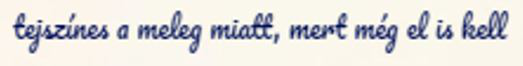

In [42]:
source_imags_path = f'{working_dir}images/' 
idx = random.randint(0,len(df)-1)
print(df['file_name'][idx])
Image.open(source_imags_path + df['file_name'][idx]).convert("RGB")

In [43]:
# model_ids_v2 = [trocr_large_hu_lines_v2_2,Roberta-base-Deit_hu_lines_v2,PULI-Deit_lines_hu_v2_1,
# trocr_large_dhl_lines,trocr_base_dhlab_lines,trocr_large_dhlab_aug_lines]
# model_ids_v4 = [Roberta-base-Deit_hu_lines_v4Corrected,PULI-Deit_lines_hu_v4]
models_id = ['Roberta-base-Deit_hu_lines_v2','ft_trocr_large_hu_lines_v4']
for id in models_id:
  print(id)
  img =  f'{source_imags_path}' + df['file_name'][idx]
  print(Image2Text(f'AlhitawiMohammed22/{id}',img))
  print('Ground truth :',df['text'][idx],'\n')

Roberta-base-Deit_hu_lines_v2


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (112) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': ' tejszínes a meleg miatt, mert még el is kell'}]
None
Ground truth : tejszínes a meleg miatt, mert még el is kell 

ft_trocr_large_hu_lines_v4


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (96) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': ' fejszínes a meleg miall, mert még el is kell'}]
None
Ground truth : tejszínes a meleg miatt, mert még el is kell 

